In [96]:
import pandas as pd
import os
import glob
import re

data_dir = os.path.join(os.path.expanduser('~'),'HCI-project','data')

def is_data_col(col, year=None):
    if year:
        full_year = '20'+year
        return ((str(year)==str(col[-2:])) and (str(full_year)!=str(col[-4:])))
    else: 
        num_alpha = [(c.isalpha() or (c=='_')) for c in col]
        return not all(num_alpha) and ('CSA' not in col)

def ingest_custom_csv(fp):
    df = pd.read_csv(fp)
    filename = os.path.basename(fp).split('.')[0]
    rename_col = lambda col_name: re.sub(r'[a-zA-Z]+',filename, col_name) if is_data_col(col_name) else col_name
    df.rename(rename_col, axis=1,inplace=True)
    return df

df = pd.concat([ingest_custom_csv(fp) for fp in glob.glob(os.path.join(data_dir,'*.csv'))],axis=1)
df

,OBJECTID,CSA2010,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)10,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)12,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)13,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)14,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)15,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)16,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)17,...,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)12,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)13,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)14,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)15,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)16,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)17,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)19,Shape__Area,Shape__Length
0,1,Allendale/Irvington/S. Hilton,41.165410,38.279570,38.9791,35.6635,37.6574,40.136054,38.418863,55.569948,...,20.032051,14.6758,14.6712,17.4632,17.6895,17.527700,23.976608,26.004228,6.377046e+07,38770.165571
1,2,Beechfield/Ten Hills/West Hills,29.941290,31.395349,29.1498,23.6686,29.8901,33.484163,27.790974,44.075829,...,11.111111,10.2703,10.0264,7.4380,15.7100,11.246200,16.716418,21.666667,4.788253e+07,37524.950533
2,3,Belair-Edison,41.099260,43.972835,41.4742,34.4673,37.4879,39.893048,36.487907,49.886878,...,13.065977,14.8794,8.8235,12.1986,14.8872,15.639800,19.896194,25.611746,4.495003e+07,31307.314843
3,4,Brooklyn/Curtis Bay/Hawkins Point,36.260160,46.927374,48.1884,39.3064,46.4762,43.144424,43.518519,55.746141,...,24.532225,24.0084,25.3906,27.4590,25.9036,25.406500,29.980658,32.859680,1.760777e+08,150987.703639
4,5,Canton,22.448980,29.729730,20.0000,34.4828,34.4828,31.034483,20.000000,38.095238,...,13.513514,13.1579,12.8205,12.1212,0.0000,12.195100,11.428571,5.263158,1.540854e+07,23338.611948
5,6,Cedonia/Frankford,35.477320,36.273764,31.9744,30.0000,34.1795,34.511628,32.980769,44.128440,...,12.085308,13.4565,7.3431,9.2348,10.0806,11.756900,16.871921,18.822023,7.154134e+07,39962.549835
6,7,Cherry Hill,44.178080,50.639854,46.6926,43.9623,46.2000,48.917749,50.752688,66.585956,...,19.181586,19.5238,18.3628,20.9302,21.3198,24.634100,25.388601,40.342298,2.914418e+07,22305.302067
7,8,Chinquapin Park/Belvedere,34.472930,29.585799,31.6993,28.3388,26.4706,30.769231,29.044118,43.065693,...,10.648148,6.2802,12.8079,12.1359,15.9624,16.826900,19.069767,19.095477,2.102259e+07,21705.411630
8,9,Claremont/Armistead,41.399420,44.662921,42.0118,38.4824,37.7465,38.832487,37.122970,50.325380,...,13.899614,12.4088,8.9744,11.3712,14.9584,16.622000,18.952618,26.436782,6.124377e+07,40104.415980
9,10,Clifton-Berea,42.219390,48.525074,51.0204,43.4234,46.9159,46.975806,46.710526,60.340633,...,20.956720,21.5962,16.3895,19.8966,24.5383,26.666700,31.791908,26.923077,2.328523e+07,24022.764621


In [89]:
df.columns.tolist()

['OBJECTID',
 'CSA2010',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)10',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)12',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)13',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)14',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)15',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)16',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)17',
 'Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)19',
 'Shape__Area',
 'Shape__Length',
 'OBJECTID',
 'CSA2010',
 'Percent_of_Students_that_are_Hispanic10',
 'Percen

In [99]:
# 2-digit year seems to be trailing 2 digits of end of interval (ex. 10 below represents 2009-2010)
years = [str(y) for y in range(10,21,1)]

from scipy import stats
corr_stats_df = pd.DataFrame()
alpha = 0.05
col_sort_by='Percent_of_Students_that_are_African_American_(non-Hispanic)'
years_for_col_sort_by = [y for y in years if (f'{col_sort_by}{y}') in df.columns.tolist()]
for year in years_for_col_sort_by:
    full_year = '20'+year
    year_cols = [c for c in df.columns.tolist() if is_data_col(c, year)]
    print(year_cols)
    csa_name_list = [c for c in df.columns.tolist() if ('CSA' in str(c))]
    assert((len(csa_name_list)==1) or (len(list(set(csa_name_list)))==1))
    csa_name = csa_name_list[0]
    df_subset = df[year_cols+[csa_name]].copy()
    df_subset = df_subset.loc[:,~df_subset.columns.duplicated()]

    drop_year = lambda col_name: col_name[:-2] if (col_name != csa_name) else col_name
    df_subset.rename(drop_year, axis=1,inplace=True)
    df_subset.set_index(csa_name,inplace=True)
    

    df_subset.sort_values(by=f'{col_sort_by}',ascending=True,inplace=True)
    df_subset.drop(columns='Percent_of_Students_that_are_Hispanic',inplace=True)
    # df_subset.plot.bar(stacked=True,title=f'20{int(year)-1:02d}-20{int(year):02d}')

    for col in df_subset.columns.tolist():
        if (col != col_sort_by):
            try:
                pearson_corr_coeff, two_tailed_p_value = stats.pearsonr(df_subset[col].tolist(),df_subset[col_sort_by].tolist())
                corr_stats_df = pd.concat([corr_stats_df,pd.DataFrame({'col1':[col_sort_by],'col2':[col],'year':[year],
                                                                    'pearson_corr_coeff':[pearson_corr_coeff],
                                                                    'two_tailed_p_value':[two_tailed_p_value]})])
            except:
                display(df_subset.head(5), col)

stat_sig_corr_df = corr_stats_df.loc[corr_stats_df['two_tailed_p_value']<alpha]
stat_sig_corr_df

['Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)10', 'Percent_of_Students_that_are_Hispanic10', 'High_School_Completion_Rate10', 'Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)10', 'Percent_of_Students_that_are_African_American_(non-Hispanic)10', 'High_School_Dropout_Withdrawl_Rate10', 'Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)10']
['Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11', 'Percent_of_Students_that_are_Hispanic11', 'High_School_Completion_Rate11', 'Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11', 'Percent_of_Students_Switching_Schools_within_School_Year11', 'Percent_of_Students_that_are_African_American_(non-Hispanic)11', 'High_School_Dropout_Withdrawl_Rate11', 'Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)11']
['Perc

,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days),High_School_Completion_Rate,Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days),Percent_of_Students_Switching_Schools_within_School_Year,Percent_of_Students_that_are_African_American_(non-Hispanic),High_School_Dropout_Withdrawl_Rate,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)
CSA2010,,,,,,,
South Baltimore,25.581395,83.333333,5.063291,0.524934,8.727273,NaN,14.864865
Orangeville/East Highlandtown,56.367432,91.379310,17.711771,2.502317,12.178112,3.340292,17.016807
Highlandtown,62.420382,82.142857,13.180516,2.967742,12.631579,2.547771,15.094340
Canton,27.777778,33.333333,2.061856,1.657459,13.725490,5.555556,5.263158
Greater Roland Park/Poplar Hill,9.523810,95.652174,1.904762,NaN,17.482517,NaN,3.508772


'Percent_of_Students_Switching_Schools_within_School_Year'

,Percent_of_9th-12th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days),High_School_Completion_Rate,Percent_of_1st-5th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days),Percent_of_Students_Switching_Schools_within_School_Year,Percent_of_Students_that_are_African_American_(non-Hispanic),High_School_Dropout_Withdrawl_Rate,Percent_of_6th-8th_Grade_Students_that_are_Chronically_Absent_(Missing_at_least_20_days)
CSA2010,,,,,,,
South Baltimore,25.581395,83.333333,5.063291,0.524934,8.727273,NaN,14.864865
Orangeville/East Highlandtown,56.367432,91.379310,17.711771,2.502317,12.178112,3.340292,17.016807
Highlandtown,62.420382,82.142857,13.180516,2.967742,12.631579,2.547771,15.094340
Canton,27.777778,33.333333,2.061856,1.657459,13.725490,5.555556,5.263158
Greater Roland Park/Poplar Hill,9.523810,95.652174,1.904762,NaN,17.482517,NaN,3.508772


'High_School_Dropout_Withdrawl_Rate'

['Percent_of_Students_that_are_Hispanic20', 'High_School_Completion_Rate20', 'Percent_of_Students_Switching_Schools_within_School_Year20', 'Percent_of_Students_that_are_African_American_(non-Hispanic)20', 'High_School_Dropout_Withdrawl_Rate20']


,High_School_Completion_Rate,Percent_of_Students_Switching_Schools_within_School_Year,Percent_of_Students_that_are_African_American_(non-Hispanic),High_School_Dropout_Withdrawl_Rate
CSA2010,,,,
Orangeville/East Highlandtown,85.365854,1.998183,9.802905,3.468208
South Baltimore,100.000000,0.500000,10.544218,NaN
Highlandtown,75.000000,3.143190,12.613784,1.970443
Canton,NaN,2.824859,12.765957,NaN
Fells Point,72.727273,2.208202,18.181818,2.898551


'High_School_Completion_Rate'

,High_School_Completion_Rate,Percent_of_Students_Switching_Schools_within_School_Year,Percent_of_Students_that_are_African_American_(non-Hispanic),High_School_Dropout_Withdrawl_Rate
CSA2010,,,,
Orangeville/East Highlandtown,85.365854,1.998183,9.802905,3.468208
South Baltimore,100.000000,0.500000,10.544218,NaN
Highlandtown,75.000000,3.143190,12.613784,1.970443
Canton,NaN,2.824859,12.765957,NaN
Fells Point,72.727273,2.208202,18.181818,2.898551


'Percent_of_Students_Switching_Schools_within_School_Year'

,High_School_Completion_Rate,Percent_of_Students_Switching_Schools_within_School_Year,Percent_of_Students_that_are_African_American_(non-Hispanic),High_School_Dropout_Withdrawl_Rate
CSA2010,,,,
Orangeville/East Highlandtown,85.365854,1.998183,9.802905,3.468208
South Baltimore,100.000000,0.500000,10.544218,NaN
Highlandtown,75.000000,3.143190,12.613784,1.970443
Canton,NaN,2.824859,12.765957,NaN
Fells Point,72.727273,2.208202,18.181818,2.898551


'High_School_Dropout_Withdrawl_Rate'

,col1,col2,year,pearson_corr_coeff,two_tailed_p_value
0,Percent_of_Students_that_are_African_American_...,Percent_of_9th-12th_Grade_Students_that_are_Ch...,10,0.372657,5.079930e-03
0,Percent_of_Students_that_are_African_American_...,Percent_of_1st-5th_Grade_Students_that_are_Chr...,11,0.582875,3.022351e-06
0,Percent_of_Students_that_are_African_American_...,Percent_of_Students_Switching_Schools_within_S...,11,0.677304,1.359317e-08
0,Percent_of_Students_that_are_African_American_...,Percent_of_1st-5th_Grade_Students_that_are_Chr...,12,0.410296,1.863428e-03
0,Percent_of_Students_that_are_African_American_...,Percent_of_Students_Switching_Schools_within_S...,12,0.767185,8.438515e-12
0,Percent_of_Students_that_are_African_American_...,Percent_of_1st-5th_Grade_Students_that_are_Chr...,13,0.397476,2.656517e-03
0,Percent_of_Students_that_are_African_American_...,Percent_of_Students_Switching_Schools_within_S...,13,0.681358,1.030911e-08
0,Percent_of_Students_that_are_African_American_...,Percent_of_9th-12th_Grade_Students_that_are_Ch...,14,0.345377,9.807050e-03
0,Percent_of_Students_that_are_African_American_...,Percent_of_1st-5th_Grade_Students_that_are_Chr...,14,0.457189,4.497360e-04
0,Percent_of_Students_that_are_African_American_...,Percent_of_Students_Switching_Schools_within_S...,14,0.782963,1.631510e-12


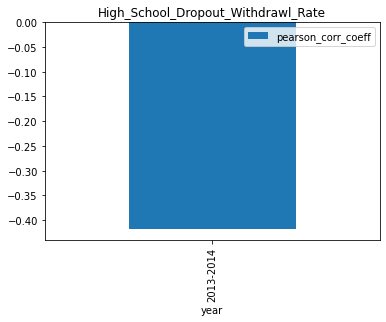

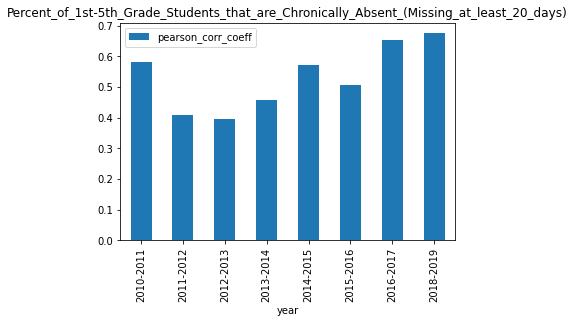

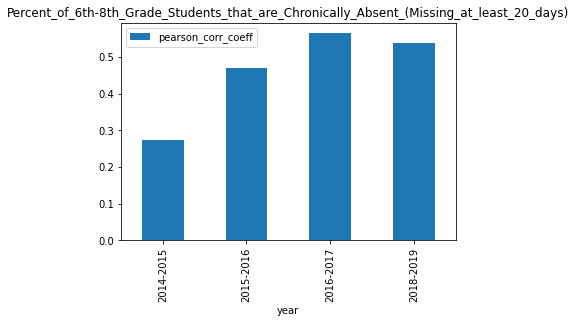

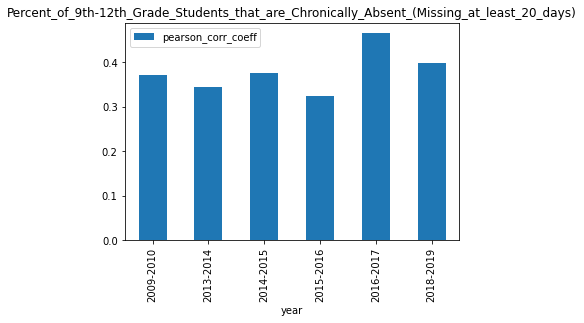

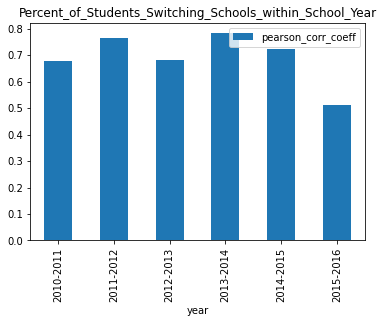

In [117]:
for group in stat_sig_corr_df[['year','col2','pearson_corr_coeff']].groupby('col2'):
    # df_subset.plot.bar(stacked=True,title=f'20{int(year)-1:02d}-20{int(year):02d}')
    stat_sig_corr_over_time = group[1].copy()
    stat_sig_corr_over_time['year'] = stat_sig_corr_over_time['year'].apply(lambda y: f'20{int(y)-1:02d}-20{int(y):02d}')
    stat_sig_corr_over_time = stat_sig_corr_over_time.set_index('year')
    stat_sig_corr_over_time.plot.bar(title=group[0])
